In [1]:
import numpy as np
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy import stats as st
from natsort import natsorted, index_natsorted
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('legend',fontsize=35)
plt.rc('axes', labelsize=40) 

In [2]:
def get_results(model_name, context="", n=3):
    if context:
        # To get results from individual models. 
        iter_files =glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        # To get results from combined models.  
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files) == n

    # Check for all 3 iterations of models with different weight intialisations
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            # Get names of all contexts. 
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            # Get results from each context. 
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["AUC"] 
            # Put results from this column into a dataframe 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            # Add this column to a list for every iteration
            iters_results_df.append(results_df)
    #Get the mean of all the mean of all the iterations.
    return pd.concat(iters_results_df).groupby(level=0).mean()


In [3]:
def get_results_print(model_name, context="", n=3):
    if context:
        # To get results from individual models. 
        iter_files =glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        # To get results from combined models.  
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files) == n
    # Check for all 3 iterations of models with different weight intialisations
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            # Get names of all contexts. 
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            # Get results from each context. 
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["AUC"] 
            # Put results from this column into a dataframe 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            # Add this column to a list for every iteration
            iters_results_df.append(results_df)

    mean =  pd.concat(iters_results_df).groupby(level=0).mean()
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    
    ci_either = (mean- ci[0])[model_name].apply(lambda x: "{:.3f}".format(x))
    mean  = mean[model_name].apply(lambda x: "{:.3f}".format(x))
    results = pd.DataFrame(mean+"±"+ci_either)
    return results.sort_index(key=lambda x: index_natsorted(results_df.index))

In [4]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_32',
               'AE_sound_FiLM_embed_64',
               'AE_sound_FiLM_embed_128',
               'AE_sound_FiLM_embed_256'
            ]
# Go through the combined model first.
results_list = []
for model_name in model_names:
    results_list.append(get_results(model_name))
single_model_list = []
# Go through the individual models section. 
for i in range(16):
    single_model_list.append(get_results("AE_sound", context=str(i)))
single_model_results = pd.concat(single_model_list)
results_df = pd.concat([single_model_results]+results_list, axis=1)
results_df


,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
fan_0_0dB,0.616174,0.589729,0.615468,0.622427,0.614699,0.633047,0.607145
fan_0_6dB,0.816429,0.700737,0.773916,0.786953,0.786967,0.779111,0.720252
fan_0_min6dB,0.556089,0.551353,0.551081,0.549368,0.543949,0.564215,0.546257
fan_1_0dB,0.880383,0.741764,0.867069,0.867133,0.872565,0.891525,0.811607
fan_1_6dB,0.976694,0.939875,0.957281,0.946734,0.944587,0.947753,0.859910
fan_1_min6dB,0.693995,0.558367,0.710676,0.727273,0.733219,0.722452,0.679482
fan_2_0dB,0.759413,0.711512,0.783415,0.803293,0.806635,0.785515,0.719748
fan_2_6dB,0.896689,0.895426,0.939317,0.934222,0.931857,0.916788,0.744148
fan_2_min6dB,0.589083,0.536454,0.567836,0.583922,0.588472,0.570989,0.559525
fan_3_0dB,0.974591,0.796405,0.957776,0.989597,0.984858,0.989933,0.943949


In [5]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_32',
               'AE_sound_FiLM_embed_64',
               'AE_sound_FiLM_embed_128',
               'AE_sound_FiLM_embed_256'
            ]
# Go through the combined model first.
results_list_print = []
for model_name in model_names:
    results_list_print.append(get_results_print(model_name))
single_model_list_print = []
# Go through the individual models section. 
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
results_df_print = pd.concat([single_model_results_print]+results_list_print, axis=1)
results_df_print 


,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
fan_0_0dB,0.616±0.033,0.590±0.004,0.615±0.044,0.622±0.074,0.615±0.041,0.633±0.018,0.607±0.099
fan_0_6dB,0.816±0.044,0.701±0.066,0.774±0.024,0.787±0.022,0.787±0.058,0.779±0.024,0.720±0.254
fan_0_min6dB,0.556±0.034,0.551±0.018,0.551±0.043,0.549±0.056,0.544±0.040,0.564±0.005,0.546±0.051
fan_1_0dB,0.880±0.023,0.742±0.184,0.867±0.052,0.867±0.021,0.873±0.054,0.892±0.060,0.812±0.201
fan_1_6dB,0.977±0.022,0.940±0.015,0.957±0.058,0.947±0.015,0.945±0.088,0.948±0.045,0.860±0.362
fan_1_min6dB,0.694±0.015,0.558±0.079,0.711±0.031,0.727±0.014,0.733±0.014,0.722±0.008,0.679±0.155
fan_2_0dB,0.759±0.223,0.712±0.074,0.783±0.024,0.803±0.002,0.807±0.017,0.786±0.029,0.720±0.328
fan_2_6dB,0.897±0.219,0.895±0.071,0.939±0.013,0.934±0.010,0.932±0.027,0.917±0.027,0.744±0.791
fan_2_min6dB,0.589±0.005,0.536±0.033,0.568±0.021,0.584±0.007,0.588±0.011,0.571±0.031,0.560±0.090
fan_3_0dB,0.975±0.014,0.796±0.127,0.958±0.017,0.990±0.010,0.985±0.022,0.990±0.003,0.944±0.192


In [6]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}
# Get the machine names etc. in a nicer format. 
results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_df.index.tolist()], index=results_df.index)
results_df["ID"] = pd.to_numeric(results_df["id"])
results_df["ID"] = results_df["ID"].map(inv_machine_id_map)
results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df["ID"].tolist()], index=results_df.index)
results_df


,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256,Machine Name,id,SNR,ID
fan_0_0dB,0.616174,0.589729,0.615468,0.622427,0.614699,0.633047,0.607145,fan,0,0dB,00
fan_0_6dB,0.816429,0.700737,0.773916,0.786953,0.786967,0.779111,0.720252,fan,0,6dB,00
fan_0_min6dB,0.556089,0.551353,0.551081,0.549368,0.543949,0.564215,0.546257,fan,0,min6dB,00
fan_1_0dB,0.880383,0.741764,0.867069,0.867133,0.872565,0.891525,0.811607,fan,1,0dB,02
fan_1_6dB,0.976694,0.939875,0.957281,0.946734,0.944587,0.947753,0.859910,fan,1,6dB,02
fan_1_min6dB,0.693995,0.558367,0.710676,0.727273,0.733219,0.722452,0.679482,fan,1,min6dB,02
fan_2_0dB,0.759413,0.711512,0.783415,0.803293,0.806635,0.785515,0.719748,fan,2,0dB,04
fan_2_6dB,0.896689,0.895426,0.939317,0.934222,0.931857,0.916788,0.744148,fan,2,6dB,04
fan_2_min6dB,0.589083,0.536454,0.567836,0.583922,0.588472,0.570989,0.559525,fan,2,min6dB,04
fan_3_0dB,0.974591,0.796405,0.957776,0.989597,0.984858,0.989933,0.943949,fan,3,0dB,06


In [7]:
print(st.wilcoxon(results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=510.0, pvalue=0.4237047023124034)


In [8]:
rank_results_df = results_df[
          ["AE_sound_all", 
           "AE_sound_FiLM_one_hot", 
           "AE_sound_FiLM_embed_32",
           "AE_sound_FiLM_embed_64",
           "AE_sound_FiLM_embed_128",
           "AE_sound_FiLM_embed_256"
          ]
        ].rank(1, ascending=False, method='first')
# Rank all combined models. 
mean_rank_row = rank_results_df.mean().to_frame().T
mean_rank_row = mean_rank_row.rename(index={0: 'average rank'})
results_and_ranks_df = pd.concat([results_df, mean_rank_row])
results_and_ranks_df

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256,Machine Name,id,SNR,ID
fan_0_0dB,0.616174,0.589729,0.615468,0.622427,0.614699,0.633047,0.607145,fan,0,0dB,00
fan_0_6dB,0.816429,0.700737,0.773916,0.786953,0.786967,0.779111,0.720252,fan,0,6dB,00
fan_0_min6dB,0.556089,0.551353,0.551081,0.549368,0.543949,0.564215,0.546257,fan,0,min6dB,00
fan_1_0dB,0.880383,0.741764,0.867069,0.867133,0.872565,0.891525,0.811607,fan,1,0dB,02
fan_1_6dB,0.976694,0.939875,0.957281,0.946734,0.944587,0.947753,0.859910,fan,1,6dB,02
fan_1_min6dB,0.693995,0.558367,0.710676,0.727273,0.733219,0.722452,0.679482,fan,1,min6dB,02
fan_2_0dB,0.759413,0.711512,0.783415,0.803293,0.806635,0.785515,0.719748,fan,2,0dB,04
fan_2_6dB,0.896689,0.895426,0.939317,0.934222,0.931857,0.916788,0.744148,fan,2,6dB,04
fan_2_min6dB,0.589083,0.536454,0.567836,0.583922,0.588472,0.570989,0.559525,fan,2,min6dB,04
fan_3_0dB,0.974591,0.796405,0.957776,0.989597,0.984858,0.989933,0.943949,fan,3,0dB,06


In [9]:
pc_diff_AE_sound = pd.concat([results_df.AE_sound, results_df.AE_sound_FiLM_embed_64], axis=1).pct_change(axis='columns')
mean_pc_diff_AE_sound_oracle = pc_diff_AE_sound.AE_sound_FiLM_embed_64.mean()
std_pc_diff_AE_sound_oracle = pc_diff_AE_sound.AE_sound_FiLM_embed_64.std()
print(mean_pc_diff_AE_sound_oracle, std_pc_diff_AE_sound_oracle)
print(wilcoxon(results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))



-0.014297129167842823 0.08324073348008752
WilcoxonResult(statistic=510.0, pvalue=0.4237047023124034)


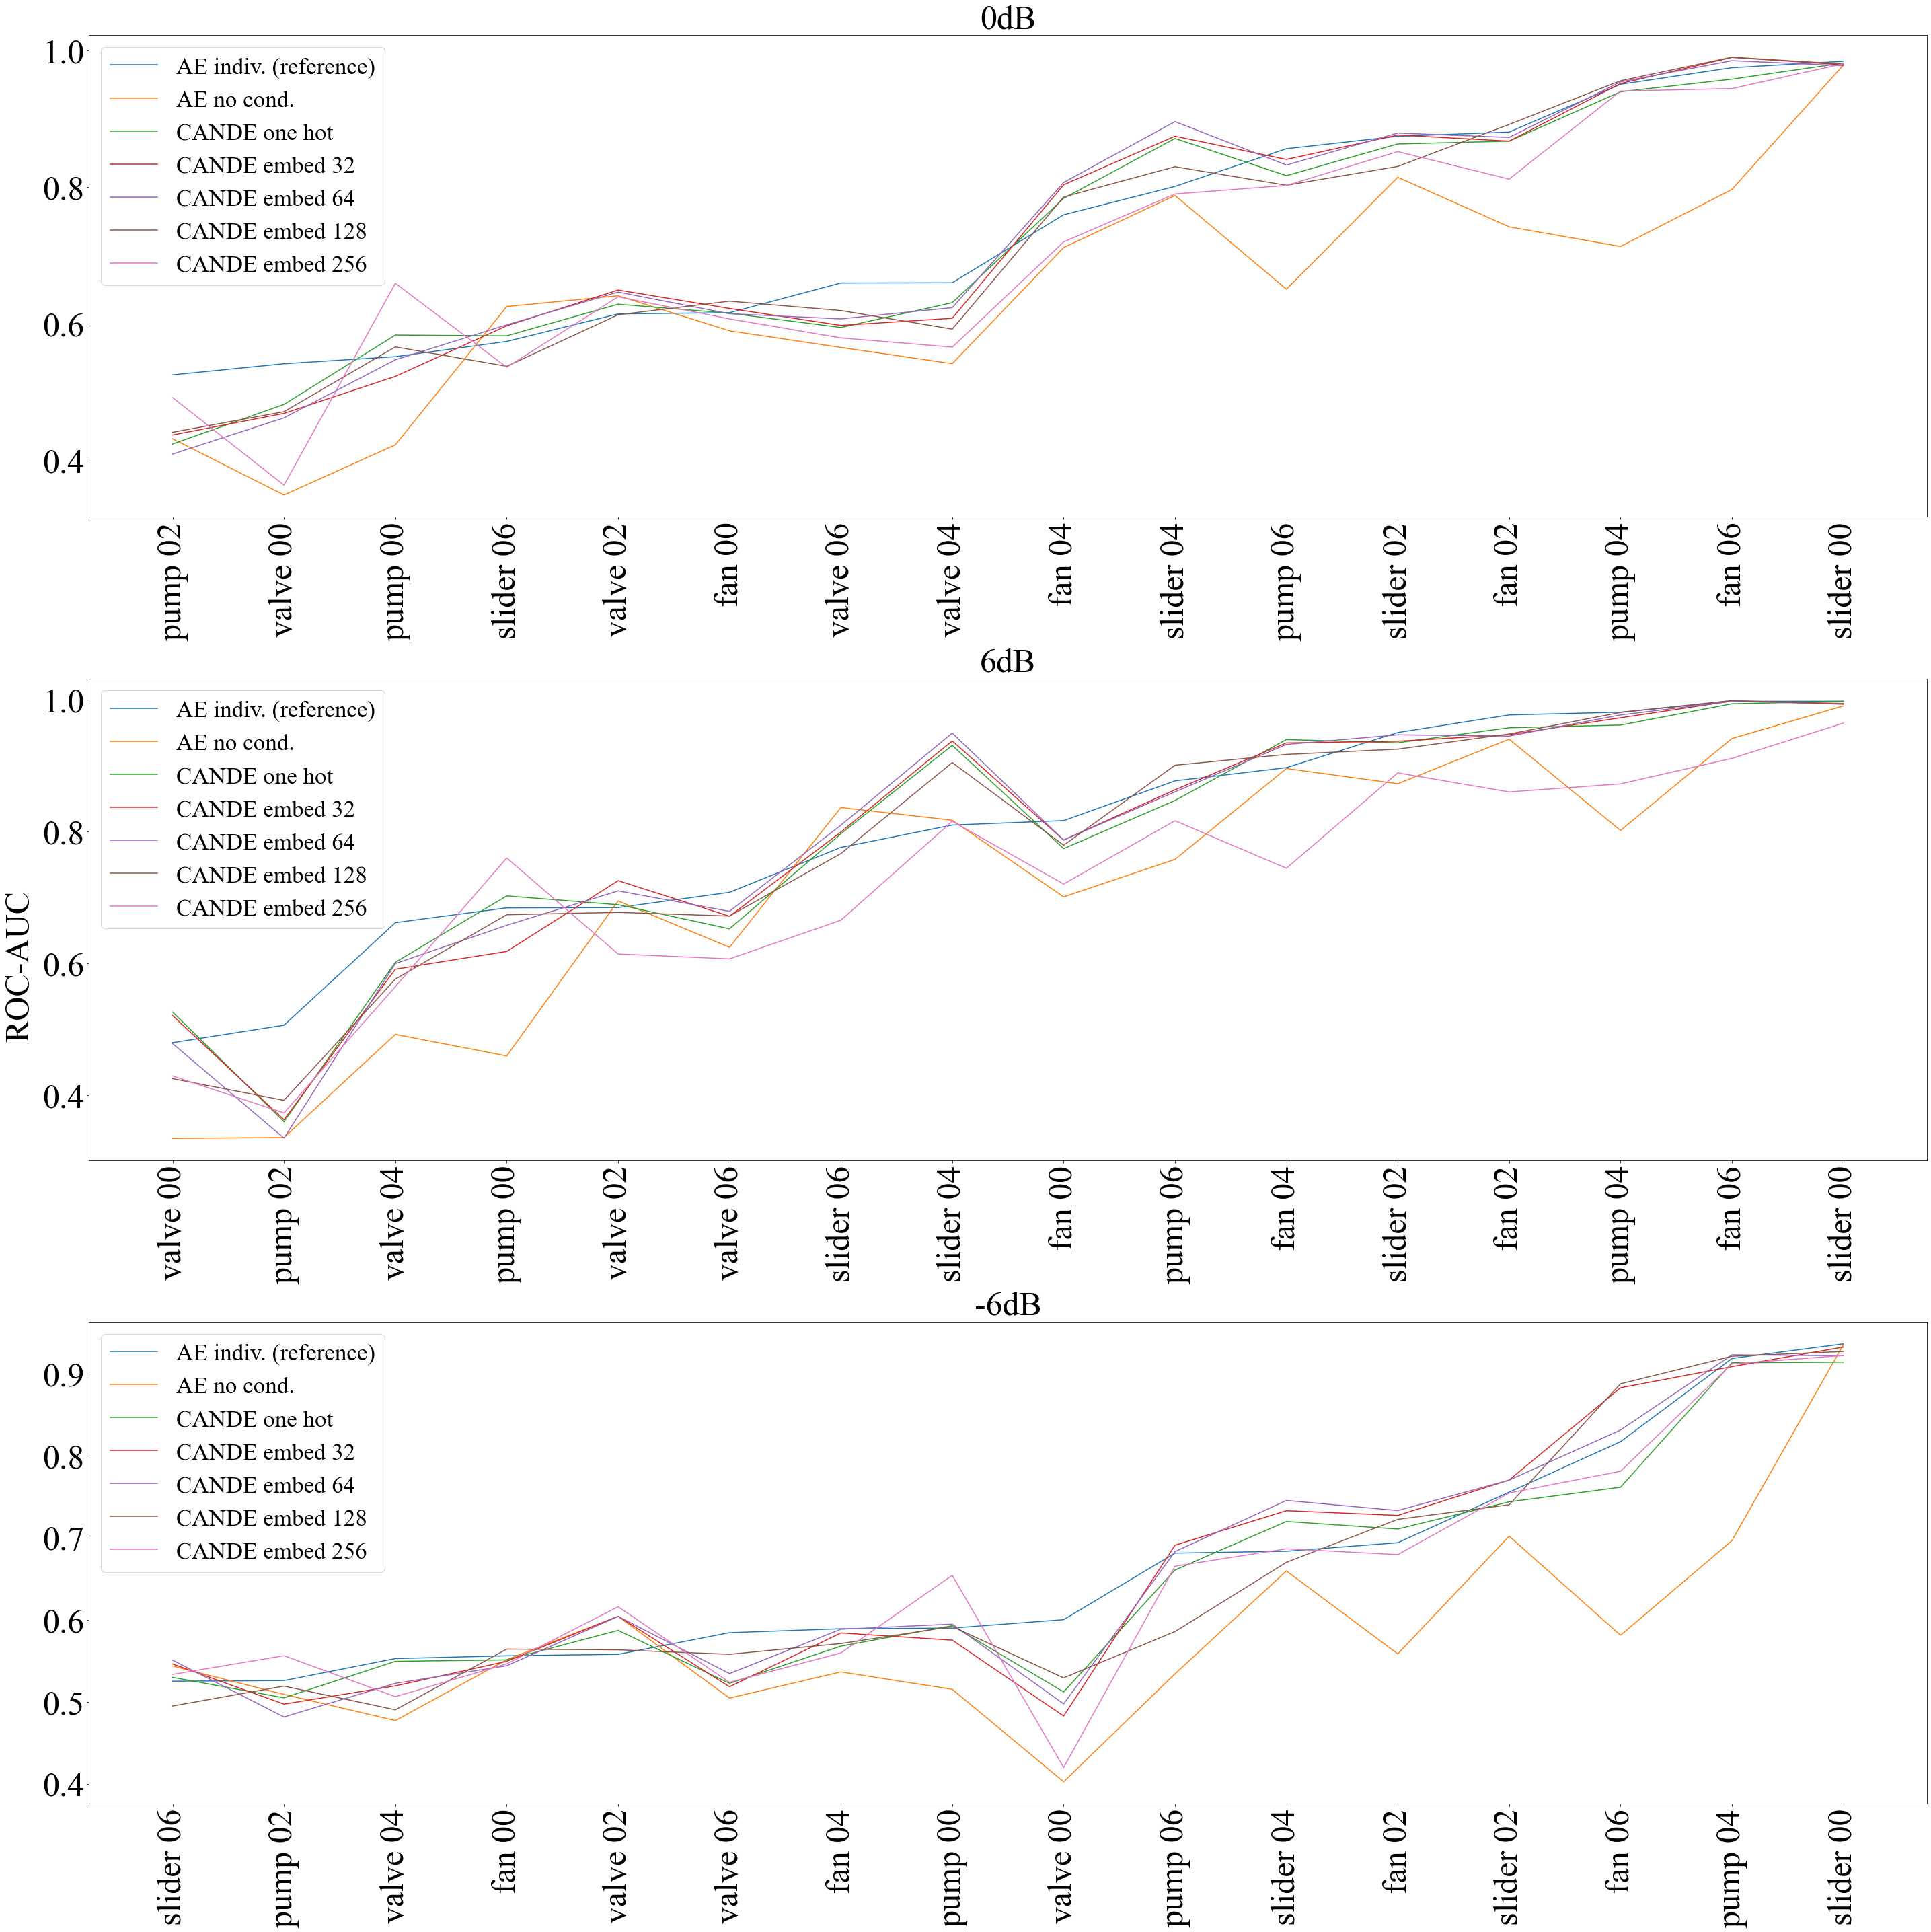

In [10]:

def plot_ax(dB_str, ax, df, cols_to_plot):
    df = df[df.SNR == dB_str]
    df_labels = df["Machine Name"]+' '+df["ID"].astype(str)
    df_labels = [s.replace('min', '-') for s in df_labels ]
    df[cols_to_plot].plot(ax=ax)
    ax.xaxis.set_ticks(range(0,len( df_labels)))
    ax.set_xticklabels(df_labels, rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=50)
    ax.set_title(dB_str.replace('min', '-'), fontsize=50)
    return ax

formatted_col_map_plot= {
           "AE_sound": "AE indiv. (reference)",
           "AE_sound_all":            "AE no cond.", 
           "AE_sound_FiLM_one_hot"  : "CANDE one hot",  
           "AE_sound_FiLM_embed_32":  "CANDE embed 32",
           "AE_sound_FiLM_embed_64":  "CANDE embed 64",
           "AE_sound_FiLM_embed_128": "CANDE embed 128",
           "AE_sound_FiLM_embed_256": "CANDE embed 256"
}


cols_to_plot = ["AE indiv. (reference)", 
                "AE no cond.",
                "CANDE one hot",
                "CANDE embed 32",
                "CANDE embed 64",
                "CANDE embed 128",
                "CANDE embed 256"
               ]

plt_results = results_df.sort_values(by="AE_sound")
plt_results = plt_results.rename(columns=formatted_col_map_plot, errors="raise")
plt_results[["Machine Name", "id", "SNR"]] = pd.DataFrame(
        [x.split('_') for x in plt_results.index.tolist()], 
        index=plt_results.index
    )
fig, axs = plt.subplots(3, figsize=(40, 40), sharex=False)
plt_results_ax = axs[0]


ax1 = plot_ax("0dB", axs[0], plt_results, cols_to_plot)
ax2 = plot_ax("6dB", axs[1], plt_results, cols_to_plot)
ax3 = plot_ax("min6dB", axs[2], plt_results, cols_to_plot)

fig.tight_layout(pad=2.0)
fig.supylabel('ROC-AUC', fontsize=50, ha='right')
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig("figs/CANDE-MIMII-ROC-AUC.png",bbox_inches='tight')


In [11]:
subset_df =  results_df[
          [
               "Machine Name",
               "ID",
               'AE_sound',
                  "AE_sound_all", 
               "AE_sound_FiLM_one_hot", 
               "AE_sound_FiLM_embed_32",
               "AE_sound_FiLM_embed_64",
               "AE_sound_FiLM_embed_128",
               "AE_sound_FiLM_embed_256"

            ]].groupby(["Machine Name","ID"]).mean()
subset_df



AE_sound  AE_sound_all  AE_sound_FiLM_one_hot  \
Machine Name ID                                                  
fan          00  0.662898      0.613939               0.646821   
             02  0.850358      0.746669               0.845009   
             04  0.748395      0.714464               0.763522   
             06  0.929727      0.772787               0.904311   
pump         00  0.608614      0.465907               0.626197   
             02  0.519114      0.425570               0.429628   
             04  0.949911      0.737011               0.938022   
             06  0.804680      0.647411               0.774713   
slider       00  0.972650      0.968002               0.964320   
             02  0.859975      0.796183               0.847090   
             04  0.764718      0.754747               0.840487   
             06  0.625005      0.668364               0.636185   
valve        00  0.540459      0.362196               0.506728   
             02  0.618935      0.646566               0.634853   
             04  0.624784      0.503650               0.593920   
             06  0.650540      0.564730               0.589815   

                 AE_sound_FiLM_embed_32  AE_sound_FiLM_embed_64  \
Machine Name ID                                                   
fan          00                0.652916                0.648539   
             02                0.847047                0.850124   
             04                0.773812                0.775655   
             06                0.956749                0.937839   
pump         00                0.572090                0.599915   
             02                0.432459                0.408580   
             04                0.944167                0.951178   
             06                0.798155                0.791768   
slider       00                0.968498                0.964328   
             02                0.861083                0.865271   
             04                0.848220                0.863457   
             06                0.647421                0.652892   
valve        00                0.490737                0.479376   
             02                0.659653                0.653426   
             04                0.572840                0.581875   
             06                0.595772                0.606813   

                 AE_sound_FiLM_embed_128  AE_sound_FiLM_embed_256  
Machine Name ID                                                    
fan          00                 0.658791                 0.624552  
             02                 0.853910                 0.783666  
             04                 0.757764                 0.674474  
             06                 0.958756                 0.878603  
pump         00                 0.610560                 0.691069  
             02                 0.450883                 0.473798  
             04                 0.952433                 0.908189  
             06                 0.762858                 0.761288  
slider       00                 0.966628                 0.955607  
             02                 0.831713                 0.831750  
             04                 0.801410                 0.763929  
             06                 0.599672                 0.578378  
valve        00                 0.475225                 0.404326  
             02                 0.617932                 0.623156  
             04                 0.552809                 0.545579  
             06                 0.616312                 0.569938

In [12]:
subset_and_ranks_df = pd.concat([subset_df, mean_rank_row])
subset_and_ranks_df

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
"(fan, 00)",0.662898,0.613939,0.646821,0.652916,0.648539,0.658791,0.624552
"(fan, 02)",0.850358,0.746669,0.845009,0.847047,0.850124,0.853910,0.783666
"(fan, 04)",0.748395,0.714464,0.763522,0.773812,0.775655,0.757764,0.674474
"(fan, 06)",0.929727,0.772787,0.904311,0.956749,0.937839,0.958756,0.878603
"(pump, 00)",0.608614,0.465907,0.626197,0.572090,0.599915,0.610560,0.691069
"(pump, 02)",0.519114,0.425570,0.429628,0.432459,0.408580,0.450883,0.473798
"(pump, 04)",0.949911,0.737011,0.938022,0.944167,0.951178,0.952433,0.908189
"(pump, 06)",0.804680,0.647411,0.774713,0.798155,0.791768,0.762858,0.761288
"(slider, 00)",0.972650,0.968002,0.964320,0.968498,0.964328,0.966628,0.955607
"(slider, 02)",0.859975,0.796183,0.847090,0.861083,0.865271,0.831713,0.831750


In [13]:
# Made final table, making column names more readable. 
table_cols = [
           "AE_sound",
           "AE_sound_all", 
           "AE_sound_FiLM_one_hot", 
           "AE_sound_FiLM_embed_32",
           "AE_sound_FiLM_embed_64",
           "AE_sound_FiLM_embed_128",
           "AE_sound_FiLM_embed_256"
          ]

results_table = subset_and_ranks_df[table_cols]
formatted_col_map= {
           "AE_sound": "AE indiv. (reference)",
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"AE FiLM one hot"  , 
           "AE_sound_FiLM_embed_32" :"AE FiLM 32 embed" ,
           "AE_sound_FiLM_embed_64" :"AE FiLM 64 embed" ,
           "AE_sound_FiLM_embed_128":"AE FiLM 128 embed",
           "AE_sound_FiLM_embed_256":"AE FiLM 256 embed"
}
formatted_results_table = results_table.rename(columns=formatted_col_map, errors="raise")
formatted_results_table

,AE indiv. (reference),AE no cond.,AE FiLM one hot,AE FiLM 32 embed,AE FiLM 64 embed,AE FiLM 128 embed,AE FiLM 256 embed
"(fan, 00)",0.662898,0.613939,0.646821,0.652916,0.648539,0.658791,0.624552
"(fan, 02)",0.850358,0.746669,0.845009,0.847047,0.850124,0.853910,0.783666
"(fan, 04)",0.748395,0.714464,0.763522,0.773812,0.775655,0.757764,0.674474
"(fan, 06)",0.929727,0.772787,0.904311,0.956749,0.937839,0.958756,0.878603
"(pump, 00)",0.608614,0.465907,0.626197,0.572090,0.599915,0.610560,0.691069
"(pump, 02)",0.519114,0.425570,0.429628,0.432459,0.408580,0.450883,0.473798
"(pump, 04)",0.949911,0.737011,0.938022,0.944167,0.951178,0.952433,0.908189
"(pump, 06)",0.804680,0.647411,0.774713,0.798155,0.791768,0.762858,0.761288
"(slider, 00)",0.972650,0.968002,0.964320,0.968498,0.964328,0.966628,0.955607
"(slider, 02)",0.859975,0.796183,0.847090,0.861083,0.865271,0.831713,0.831750


In [14]:
print(formatted_results_table.to_latex(index=True, columns=formatted_results_table.columns, float_format='%.3f'))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  AE indiv. (reference) &  AE no cond. &  AE FiLM one hot &  AE FiLM 32 embed &  AE FiLM 64 embed &  AE FiLM 128 embed &  AE FiLM 256 embed \\
\midrule
(fan, 00)    &                  0.663 &        0.614 &            0.647 &             0.653 &             0.649 &              0.659 &              0.625 \\
(fan, 02)    &                  0.850 &        0.747 &            0.845 &             0.847 &             0.850 &              0.854 &              0.784 \\
(fan, 04)    &                  0.748 &        0.714 &            0.764 &             0.774 &             0.776 &              0.758 &              0.674 \\
(fan, 06)    &                  0.930 &        0.773 &            0.904 &             0.957 &             0.938 &              0.959 &              0.879 \\
(pump, 00)   &                  0.609 &        0.466 &            0.626 &             0.572 &             0.600 &              0.611 &              0.691 \\
(pump, 02)   &          

In [15]:

model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_32',
               'AE_sound_FiLM_embed_64',
               'AE_sound_FiLM_embed_128',
               'AE_sound_FiLM_embed_256'
            ]
# Go through the combined model first.
results_list_print = []
for model_name in model_names:
    results_list_print.append(get_results_print(model_name))
single_model_list_print = []
# Go through the individual models section. 
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
results_df_print = pd.concat([single_model_results_print]+results_list_print, axis=1)
results_df_print

,AE_sound,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_32,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_128,AE_sound_FiLM_embed_256
fan_0_0dB,0.616±0.033,0.590±0.004,0.615±0.044,0.622±0.074,0.615±0.041,0.633±0.018,0.607±0.099
fan_0_6dB,0.816±0.044,0.701±0.066,0.774±0.024,0.787±0.022,0.787±0.058,0.779±0.024,0.720±0.254
fan_0_min6dB,0.556±0.034,0.551±0.018,0.551±0.043,0.549±0.056,0.544±0.040,0.564±0.005,0.546±0.051
fan_1_0dB,0.880±0.023,0.742±0.184,0.867±0.052,0.867±0.021,0.873±0.054,0.892±0.060,0.812±0.201
fan_1_6dB,0.977±0.022,0.940±0.015,0.957±0.058,0.947±0.015,0.945±0.088,0.948±0.045,0.860±0.362
fan_1_min6dB,0.694±0.015,0.558±0.079,0.711±0.031,0.727±0.014,0.733±0.014,0.722±0.008,0.679±0.155
fan_2_0dB,0.759±0.223,0.712±0.074,0.783±0.024,0.803±0.002,0.807±0.017,0.786±0.029,0.720±0.328
fan_2_6dB,0.897±0.219,0.895±0.071,0.939±0.013,0.934±0.010,0.932±0.027,0.917±0.027,0.744±0.791
fan_2_min6dB,0.589±0.005,0.536±0.033,0.568±0.021,0.584±0.007,0.588±0.011,0.571±0.031,0.560±0.090
fan_3_0dB,0.975±0.014,0.796±0.127,0.958±0.017,0.990±0.010,0.985±0.022,0.990±0.003,0.944±0.192


In [16]:
formatted_col_map= {
           "AE_sound": "AE indiv. (reference)",
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE one hot",  
           "AE_sound_FiLM_embed_32": "CANDE embed 32",
           "AE_sound_FiLM_embed_64": "CANDE embed 64",
           "AE_sound_FiLM_embed_128": "CANDE embed 128",
           "AE_sound_FiLM_embed_256": "CANDE embed 256"
}

results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_df_print.index.tolist()], index=results_df_print.index)
results_df_print["ID"] = pd.to_numeric(results_df_print["id"])
results_df_print["ID"] = results_df_print["ID"].map(inv_machine_id_map)

results_df_print["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df_print["ID"].tolist()], index=results_df_print.index)

formatted_results_ranks_df_print= pd.concat([results_df_print, mean_rank_row])
formatted_results_ranks_df_print= formatted_results_ranks_df_print.rename(columns=formatted_col_map, errors="raise")


formatted_results_ranks_df_print = formatted_results_ranks_df_print[[
    "Machine Name",
    "ID",
    "SNR",
    "AE indiv. (reference)",
     "AE no cond.", 
    "CANDE one hot", 
    "CANDE embed 32",
    "CANDE embed 64",
    "CANDE embed 128",
    "CANDE embed 256",
]]
formatted_results_ranks_df_print

,Machine Name,ID,SNR,AE indiv. (reference),AE no cond.,CANDE one hot,CANDE embed 32,CANDE embed 64,CANDE embed 128,CANDE embed 256
fan_0_0dB,fan,00,0dB,0.616±0.033,0.590±0.004,0.615±0.044,0.622±0.074,0.615±0.041,0.633±0.018,0.607±0.099
fan_0_6dB,fan,00,6dB,0.816±0.044,0.701±0.066,0.774±0.024,0.787±0.022,0.787±0.058,0.779±0.024,0.720±0.254
fan_0_min6dB,fan,00,min6dB,0.556±0.034,0.551±0.018,0.551±0.043,0.549±0.056,0.544±0.040,0.564±0.005,0.546±0.051
fan_1_0dB,fan,02,0dB,0.880±0.023,0.742±0.184,0.867±0.052,0.867±0.021,0.873±0.054,0.892±0.060,0.812±0.201
fan_1_6dB,fan,02,6dB,0.977±0.022,0.940±0.015,0.957±0.058,0.947±0.015,0.945±0.088,0.948±0.045,0.860±0.362
fan_1_min6dB,fan,02,min6dB,0.694±0.015,0.558±0.079,0.711±0.031,0.727±0.014,0.733±0.014,0.722±0.008,0.679±0.155
fan_2_0dB,fan,04,0dB,0.759±0.223,0.712±0.074,0.783±0.024,0.803±0.002,0.807±0.017,0.786±0.029,0.720±0.328
fan_2_6dB,fan,04,6dB,0.897±0.219,0.895±0.071,0.939±0.013,0.934±0.010,0.932±0.027,0.917±0.027,0.744±0.791
fan_2_min6dB,fan,04,min6dB,0.589±0.005,0.536±0.033,0.568±0.021,0.584±0.007,0.588±0.011,0.571±0.031,0.560±0.090
fan_3_0dB,fan,06,0dB,0.975±0.014,0.796±0.127,0.958±0.017,0.990±0.010,0.985±0.022,0.990±0.003,0.944±0.192


In [17]:
print(formatted_results_ranks_df_print.to_latex( columns=formatted_results_ranks_df_print.columns, index=False))

\begin{tabular}{llllllllll}
\toprule
Machine Name &   ID &     SNR & AE indiv. (reference) &  AE no cond. & CANDE one hot & CANDE embed 32 & CANDE embed 64 & CANDE embed 128 & CANDE embed 256 \\
\midrule
         fan &   00 &     0dB &           0.616±0.033 &  0.590±0.004 &   0.615±0.044 &    0.622±0.074 &    0.615±0.041 &     0.633±0.018 &     0.607±0.099 \\
         fan &   00 &     6dB &           0.816±0.044 &  0.701±0.066 &   0.774±0.024 &    0.787±0.022 &    0.787±0.058 &     0.779±0.024 &     0.720±0.254 \\
         fan &   00 &  min6dB &           0.556±0.034 &  0.551±0.018 &   0.551±0.043 &    0.549±0.056 &    0.544±0.040 &     0.564±0.005 &     0.546±0.051 \\
         fan &   02 &     0dB &           0.880±0.023 &  0.742±0.184 &   0.867±0.052 &    0.867±0.021 &    0.873±0.054 &     0.892±0.060 &     0.812±0.201 \\
         fan &   02 &     6dB &           0.977±0.022 &  0.940±0.015 &   0.957±0.058 &    0.947±0.015 &    0.945±0.088 &     0.948±0.045 &     0.860±0.362 \\
      

In [18]:
# Get models with best validation accuracy for discriminative model. 
best_val_accs = []
layer_sizes = []
for mlp_i in ["32", "64", "128", "256"]:
    with open("logs/mlp_sound_{}/MLP_sound_{}.json".format(mlp_i, mlp_i), "r") as mlp_json:
        mlp_i_log = json.load(mlp_json)
        val_accs = mlp_i_log["val_accs"]
        best_val_epoch = mlp_i_log["best_val_epoch"]
        best_val_accs.append(np.max(val_accs)*100)
        layer_sizes.append(mlp_i)
        assert np.argmax(val_accs) == mlp_i_log["best_val_epoch"]-1
supervised_results = pd.DataFrame.from_dict(
        {'Layer size': layer_sizes, 
         '% Validation Accuracy': best_val_accs
        }
    )
supervised_results 
        

,Layer size,% Validation Accuracy
0,32,82.892031
1,64,83.054175
2,128,83.018848
3,256,82.450019


In [19]:
val_n = 1055853
val_accs = supervised_results ["% Validation Accuracy"].values/100
se = np.sqrt( (val_accs*(1-val_accs) ) /val_n)
se

array([0.00036648, 0.0003651 , 0.0003654 , 0.0003702 ])

In [20]:
z_95 = 1.96
ci_upper = val_accs + (1.96 * se)
ci_lower = val_accs - (1.96 * se)
print(ci_upper, ci_lower)
supervised_results["ci_one_side"] = 1.96 * se
supervised_results["ci_one_side %"] = supervised_results["ci_one_side"]*100
print(supervised_results)

[0.82963862 0.83125735 0.83090467 0.82522578] [0.82820201 0.82982616 0.8294723  0.82377461]
  Layer size  % Validation Accuracy  ci_one_side  ci_one_side %
0         32              82.892031     0.000718       0.071831
1         64              83.054175     0.000716       0.071559
2        128              83.018848     0.000716       0.071619
3        256              82.450019     0.000726       0.072558


In [21]:
supervised_results['% Validation Accuracy ± 95/% ci.'] = supervised_results['% Validation Accuracy'].round(3).astype(str) +' ± '+  supervised_results['ci_one_side %'].round(4).astype(str)

In [22]:
supervised_results[['Layer size', '% Validation Accuracy ± 95/% ci.']]

,Layer size,% Validation Accuracy ± 95/% ci.
0,32,82.892 ± 0.0718
1,64,83.054 ± 0.0716
2,128,83.019 ± 0.0716
3,256,82.45 ± 0.0726


In [23]:
print(supervised_results[['Layer size', '% Validation Accuracy ± 95/% ci.']].to_latex(index=False))        

\begin{tabular}{ll}
\toprule
Layer size & \% Validation Accuracy ± 95/\% ci. \\
\midrule
        32 &                  82.892 ± 0.0718 \\
        64 &                  83.054 ± 0.0716 \\
       128 &                  83.019 ± 0.0716 \\
       256 &                   82.45 ± 0.0726 \\
\bottomrule
\end{tabular}

